# COVID 19 Data Analysis using Python
------------------------------------------

## Project outline:
### In this project, I worked with the COVID19 dataset, published by John Hopkins University, which consists of the data related to the cumulative number of confirmed cases, per day, in each Country. Also, I have another dataset consist of various life factors, scored by the people living in each country around the globe.  I merged these two datasets to see if there is any relationship between the spread of the virus in a country and how happy people are, living in that country.
#### The data was recorded from Jan 2020 to April 2020

### Modules are imported

In [117]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Importing COVID-19 Dataset

importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [118]:
corona_dataset_csv=pd.read_csv("Datasets/covid19_Confirmed_dataset.csv")
corona_dataset_csv.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


#### Let's check the shape of the dataframe

In [119]:
corona_dataset_csv.shape

(266, 104)

### Delete the useless columns
The latitude and longitude columns are useless and can be deleted by using the df.drop() method.The inplace parameter is set to True,this means we do not have to assign the value of the dataset to a new dataset it will be updated automatically.

In [120]:
 corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)

In [121]:
corona_dataset_csv.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


### Aggregating the rows by the country
Since the Province/State column contains value of COVID-19 cases by Province/State in the given country.We have to sum the countrywide cases,so we use the .groupby() command and aggregate it using the sum() function.

In [122]:
corona_dataset_aggregated=corona_dataset_csv.groupby("Country/Region").sum()
#Country/Region is set as index automatically

In [123]:
corona_dataset_aggregated.head(10)
#Shows us the top 10 countries in chronological order

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
Argentina,0,0,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
Armenia,0,0,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
Australia,0,0,0,0,4,5,5,6,9,9,...,6645,6652,6662,6677,6694,6714,6721,6744,6752,6766


In [124]:
corona_dataset_aggregated.shape

(187, 100)

#### The no. of row is equal to total countries in this cleaned dataset i.e. 187 countries.

### Visualizing data related to a country for example China,India and Spain
Visualization always helps for better understanding of our data.Here, we are using he .loc[] function to select the specified index and plot the data using the .plot() function.Furthermore,the legend can be seen by using plt.legend().

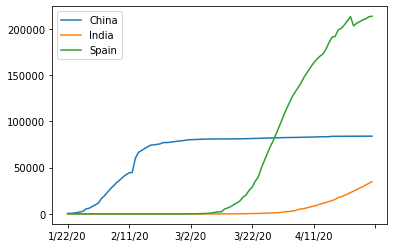

In [125]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()

### Calculating a good measure 
We need to find a good measure represented as a number, describing the spread of the virus in a country. 

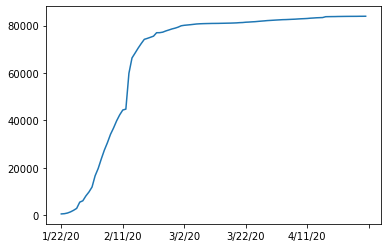

In [126]:
corona_dataset_aggregated.loc['China'].plot()

#### The first 3 days when the data was recorded 
The data for the first 3 days can be seen

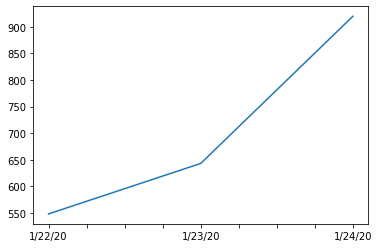

In [127]:
corona_dataset_aggregated.loc["China"][:3].plot()

### Calculating the first derivative of the curve
Calculating the first derivative of the curve will give us the number of cases cumulating in 24 hrs.That's basic maths. :P
We use the diff() function to take the first derivative of data corresponding to China and plot it.

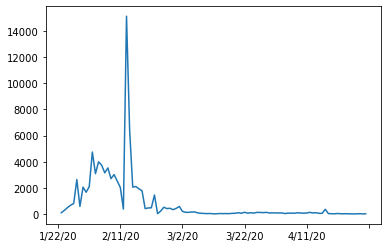

In [128]:
corona_dataset_aggregated.loc["China"].diff().plot()

### Finding maxmimum infection rate for China, India, Spain
Let's say the infection rate is defined for each day, so we use the .max() function to find the maximum number of confirmed cases in the dataset of China,India and Spain.

In [129]:
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [130]:
corona_dataset_aggregated.loc["India"].diff().max()

1893.0

In [131]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

#### Here,we can see the maximum no. of confirmed cases in 24 hrs. in the specified countries during the month of April.

### Find maximum infection rate for all of the countries. 
Now, we can iterate the countries using a for loop and we can find out the maximum infection rate for all the countries.

In [132]:
countries=list(corona_dataset_aggregated.index)
max_infection_rate=[]
for c in countries:
    max_infection_rate.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["Max_infection_rate"]=max_infection_rate

In [133]:
corona_dataset_aggregated.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,24,24,24,24,24,24,24,24,24,6.0
Argentina,0,0,0,0,0,0,0,0,0,0,...,3144,3435,3607,3780,3892,4003,4127,4285,4428,291.0
Armenia,0,0,0,0,0,0,0,0,0,0,...,1473,1523,1596,1677,1746,1808,1867,1932,2066,134.0
Australia,0,0,0,0,4,5,5,6,9,9,...,6652,6662,6677,6694,6714,6721,6744,6752,6766,497.0


### Create a new dataframe with only required column
We can extract only relevant column i.e. Max_infection_rate

In [134]:
corona_data=pd.DataFrame(corona_dataset_aggregated["Max_infection_rate"])

In [135]:
corona_data.head(10)

,Max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
Antigua and Barbuda,6.0
Argentina,291.0
Armenia,134.0
Australia,497.0


### Importing the World Happiness Report dataset
- Importing the WorldHappinessReport.csv dataset
- Selecting required columns for our analysis 
- Joining the datasets 
- Calculate the correlations as the result of our analysis

### Importing the World Happiness dataset

In [136]:
happiness_report_csv=pd.read_csv("Datasets/worldwide_happiness_report.csv")

In [137]:
happiness_report_csv.head()
#Shows the first 5 rows

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Let's drop the useless columns 
Here, Overall rank,Score,Generosity and Perceptions of corruption are useless columns.Let's drop them.

In [138]:
happiness_report_csv.drop(["Overall rank","Score","Perceptions of corruption","Generosity"],axis="columns",inplace=True)

In [139]:
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Changing the indices of the dataframe
Since we have to merge the World Happiness dataframe with our earlier COVID-19 dataframe,we have to set the countries as index.

In [140]:
happiness_report_csv.set_index("Country or region",inplace=True)
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Now let's join two dataset we have prepared  
Note that the COVID-19 dataset has 187 countries in it's index and the World Happiness dataset has 156.So,when we merge these 2 using an inner join,only the countries common to both the dataframes will be given as an output.The rest of the countries will be filled with NaN's.

#### Corona Dataset :

In [141]:
corona_data.head()
corona_data.shape

(187, 1)

#### wolrd happiness report Dataset :

In [142]:
happiness_report_csv.head()
happiness_report_csv.shape

(156, 4)

In [143]:
data=corona_data.join(happiness_report_csv,how="inner")
data.head(10)
#Observing our prepared data frame.

,Max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
Australia,497.0,1.372,1.548,1.036,0.557
Austria,1321.0,1.376,1.475,1.016,0.532
Azerbaijan,105.0,1.043,1.147,0.769,0.351
Bahrain,301.0,1.362,1.368,0.871,0.536
Bangladesh,641.0,0.562,0.928,0.723,0.527


### Correlation matrix 
A correlation matrix helps us get an idea about the relationship b/w 2 variables i.e how dependent they are on each other.
A correlation of 1 denotes a strong relationship.A correlation of 0 denotes no relationship.

In [144]:
data.corr()

,Max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


## Inferences from the Correlation Matrix
- There is indeed a relation b/w GDP per capita and the maximum infection rate of a country.
- There is another correlation of 0.29 b/w Healthy life expectancy in the country and the maximum infection rate, which means countries with higher healthy life expectancy have recorded the highest no. of cases rising in 24 hrs. and these are the countries with higher GDP per capita .
- Countries with high social support also have recorded a greater number of cases than countries with lesser social support in the governmental policies.


### Visualization of the results
A visual analysis will help us get a better idea about the inferences from the correlation matrix.

In [145]:
data.head()

,Max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Plotting GDP vs maximum Infection rate
We use a scatter plot here to infer the relation b/w GDP and maximum infection rate.

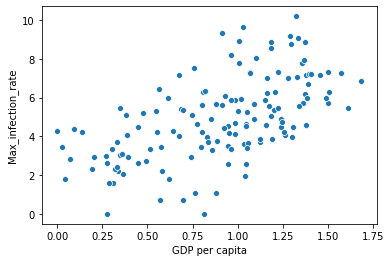

In [146]:
x=data["GDP per capita"]
y=data["Max_infection_rate"]
sns.scatterplot(x,np.log(y))

#### We further improve the plot by using the regplot() function of seaborn library.

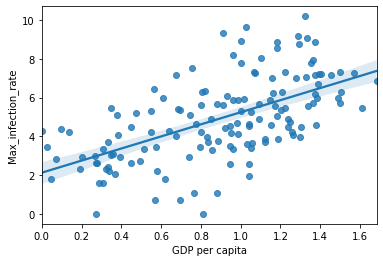

In [147]:
sns.regplot(x,np.log(y))

### Plotting Social support vs maximum Infection rate

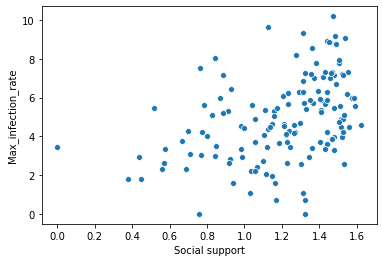

In [148]:
y=data["Max_infection_rate"]
x=data["Social support"]
sns.scatterplot(x,np.log(y))

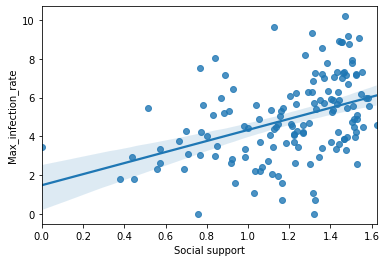

In [149]:
sns.regplot(x,np.log(y))

### Plotting Healthy life expectancy vs maximum Infection rate

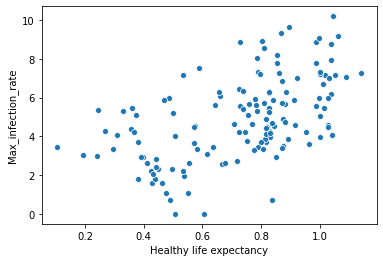

In [150]:
y=data["Max_infection_rate"]
x=data["Healthy life expectancy"]
sns.scatterplot(x,np.log(y))

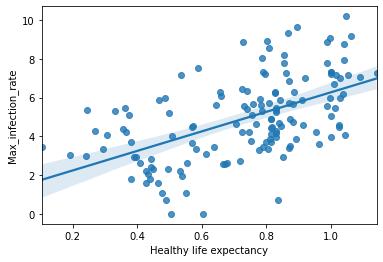

In [151]:
sns.regplot(x,np.log(y))

### Plotting Freedom to make life choices vs maximum Infection rate

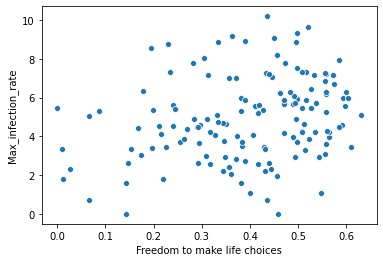

In [152]:
y=data["Max_infection_rate"]
x=data["Freedom to make life choices"]
sns.scatterplot(x,np.log(y))

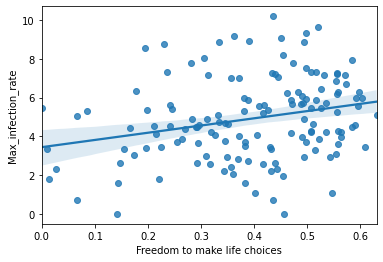

In [153]:
sns.regplot(x,np.log(y))

# Importing COVID-19 Deaths data


In [154]:
covid_deaths=pd.read_csv("Datasets/covid19_deaths_dataset.csv")
covid_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [155]:
covid_deaths.drop(["Lat","Long"],axis="columns",inplace=True)
covid_deaths.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [156]:
covid_deaths_agg=covid_deaths.groupby("Country/Region").sum()

In [157]:
covid_deaths_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


## Plotting data for number of deaths in India, US,China

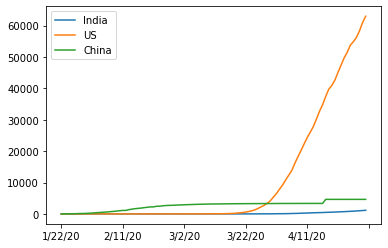

In [158]:
covid_deaths_agg.loc["India"].plot()
covid_deaths_agg.loc["US"].plot()
covid_deaths_agg.loc["China"].plot()
plt.legend()

## Death rate of India from January 2020 to April 2020
Death rate is plotted in deaths per 24 hrs.

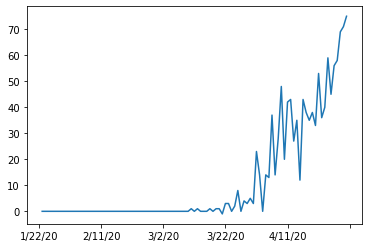

In [159]:
covid_deaths_agg.loc["India"].diff().plot()

### You can see a sharp rise beginning from 22nd March 2020 just when the GOI announced Lockdown 1.0

# Maximum death rate in India
From  the period ranging from Jan 2020 to April 2020

In [160]:
covid_deaths_agg.loc["India"].diff().max()

75.0

## Adding Maximum death rate column for all countries


In [161]:
max_death_rate=[]
countries=list(covid_deaths_agg.index)
for c in countries:
    max_death_rate.append(covid_deaths_agg.loc[c].diff().max())
covid_deaths_agg["Max death rate"]=max_death_rate
covid_deaths_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max death rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


# Extracting the Maximum death rate column


In [162]:
death=pd.DataFrame(covid_deaths_agg["Max death rate"])
death

,Max death rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0
...,...
West Bank and Gaza,1.0
Western Sahara,0.0
Yemen,2.0


## Now, we can join the World Happiness dataset with death dataset


In [163]:
death.shape

(187, 1)

In [164]:
happiness_report_csv.shape

(156, 4)

In [165]:
happy_death=death.join(happiness_report_csv,how="inner")
happy_death.head()

,Max death rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


# The Correlation Matrix 

In [166]:
happy_death.corr()

,Max death rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max death rate,1.000000,0.259893,0.204148,0.309666,0.080166
GDP per capita,0.259893,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.394603,0.456246,0.427892,1.000000


## Inferences from the Correlation Matrix
- There is a correlation b/w GDP per capita and the maximum death rate of a country.Countries with higher GDP have recorded higher number of deaths.
- There is another correlation of 0.30 b/w Healthy life expectancy in the country and the maximum infection rate, which means countries with higher healthy life expectancy have recorded the highest no. of deaths rising in 24 hrs. and these are the countries with higher GDP per capita .
- Countries with high social support also have recorded a greater number ofdeaths than countries with lesser social support in the governmental policies.


# Visualisation of Results


## Relation b/w GDP per capita and Max death rate 

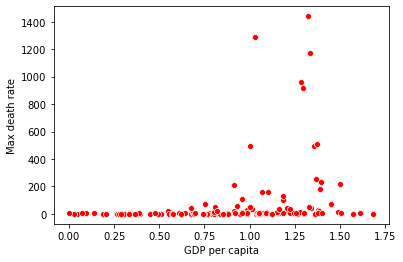

In [167]:
x=happy_death["GDP per capita"]
y=happy_death["Max death rate"]
sns.scatterplot(x,y,color="r")

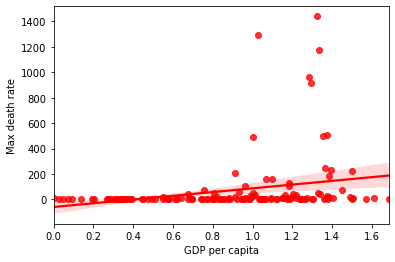

In [168]:
sns.regplot(x,y,color="r")

## Relation b/w Healthy life expectancy and Max death rate 

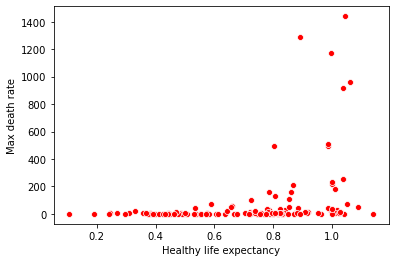

In [169]:
x=happy_death["Healthy life expectancy"]
y=happy_death["Max death rate"]
sns.scatterplot(x,y,color="r")

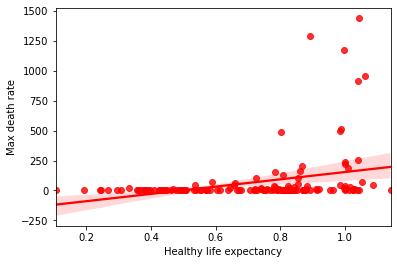

In [170]:
sns.regplot(x,y,color="r")

## Relation b/w Social Support and Max death rate 

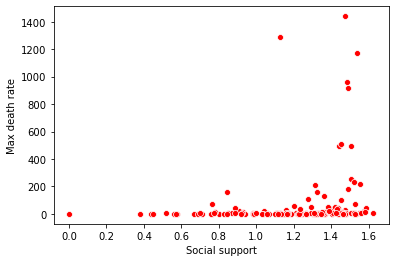

In [171]:
x=happy_death["Social support"]
y=happy_death["Max death rate"]
sns.scatterplot(x,y,color="r")

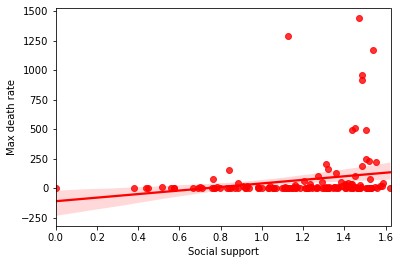

In [172]:
sns.regplot(x,y,color="r")

# How is Healthy life expectancy in countries related with GDP and their max death rate?

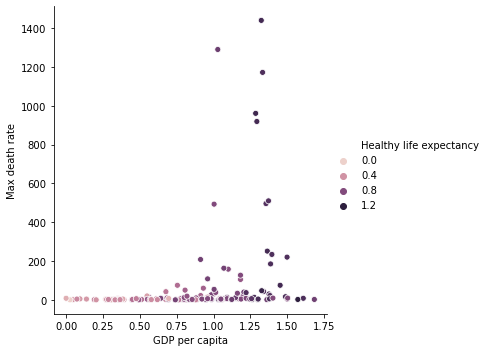

In [173]:
sns.relplot(kind="scatter",data=happy_death,x="GDP per capita",y="Max death rate",hue="Healthy life expectancy")

### The above graph shows us the relation b/w the three.

# Conclusion

- 1)The countries with higher GDP per capita recorded a high number of cases detected and greater number of deaths than countries with a lower GDP.
- 2)The countries with higher healthy life expectancy recorded more number of cases and more number of deaths.
- 3)The countries with greater social support recorded large number of cases/deaths.
- The reasons can be as follows:
- 1)Availablility of better health facilities in higher GDP countries which resulted in faster detection of cases.
- 2)The countries with high GDP like the US recorded a higher number of deaths/cases due to poor implementation of lockdown.
- 3)The number of tests which were being performed in that period in countries with lower GDP were not enough to record the number of cases.
However,there is not one particular reason, there are multiple reasons regarding the spread of the virus in a country.These are a few inferences from the data.